# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [617]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [619]:
# loading data
path=r"C:\Data Science and Business Analytics WD\Supervised Learning - Foundations\Project 3_SLF_Linear Regression\used_device_data.csv"
data = pd.read_csv(path) ## Complete the code to read the data

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Displaying the first few rows of the dataset

In [621]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


### OBSERVATIONS
 -The dataset contains information about different brands of used and refurbrished devices
 -Devices with higher specifications seems to have higher normalized_used_price wheras those with more days_used have slight decrease in   normalized_used_price

### Checking the shape of the dataset

In [623]:
## Shape of data
data.shape

(3454, 15)

### OBSERVATIONS
 -The dataset contains information (15 features) about 3454 Devices

### Checking the data types of the columns for the dataset

In [625]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

### OBSERVATIONS
 -There are 11 numeric (float and int type) and 4 string (object type) columns in the data
 -The target variable is the normalized_used_price, which is of float type

### Statistical summary of the dataset

In [627]:
## Statistical summary of the data
data.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


### OBSERVATIONS
 -The normalized_used_price ranges between 1.54 and 6.62, indication a large variation due to age, specification, brand reputation and battery life.
This suggests opportunity to model or segment phones by value tiers
 
 -Since normalized_new_price average is around 5.23 and the average of the normalized_used_price is 4.36, it suggest that the average used price is about 16.5% lower than the new price

 - The median of 4.41 with a mean of 4.36 suggest that the distribution is roughly symmetric though outliers exist.
 - The minimum value of 1.54 indicates some very cheap used phones, possibly with poor specs or heavy usage.
 

In [778]:
### Additional Comments on statistical data
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


### Checking for duplicate values

In [631]:
## Duplicate entries in the data
data.duplicated() 

0       False
1       False
2       False
3       False
4       False
        ...  
3449    False
3450    False
3451    False
3452    False
3453    False
Length: 3454, dtype: bool

### COMMENTS
There are no duplicate  values in the data

In [633]:
print(f"Number of duplicate rows: {data.duplicated().sum()}")

Number of duplicate rows: 0


### Checking for missing values

In [635]:
## Checking missing entries in the data
data.isnull()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3450,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3451,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3452,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [780]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

### COMMENTS
 - There are missing values in some columns.

In [639]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

## Exploratory Data Analysis

### Univariate Analysis

In [641]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [643]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`normalized_used_price`**

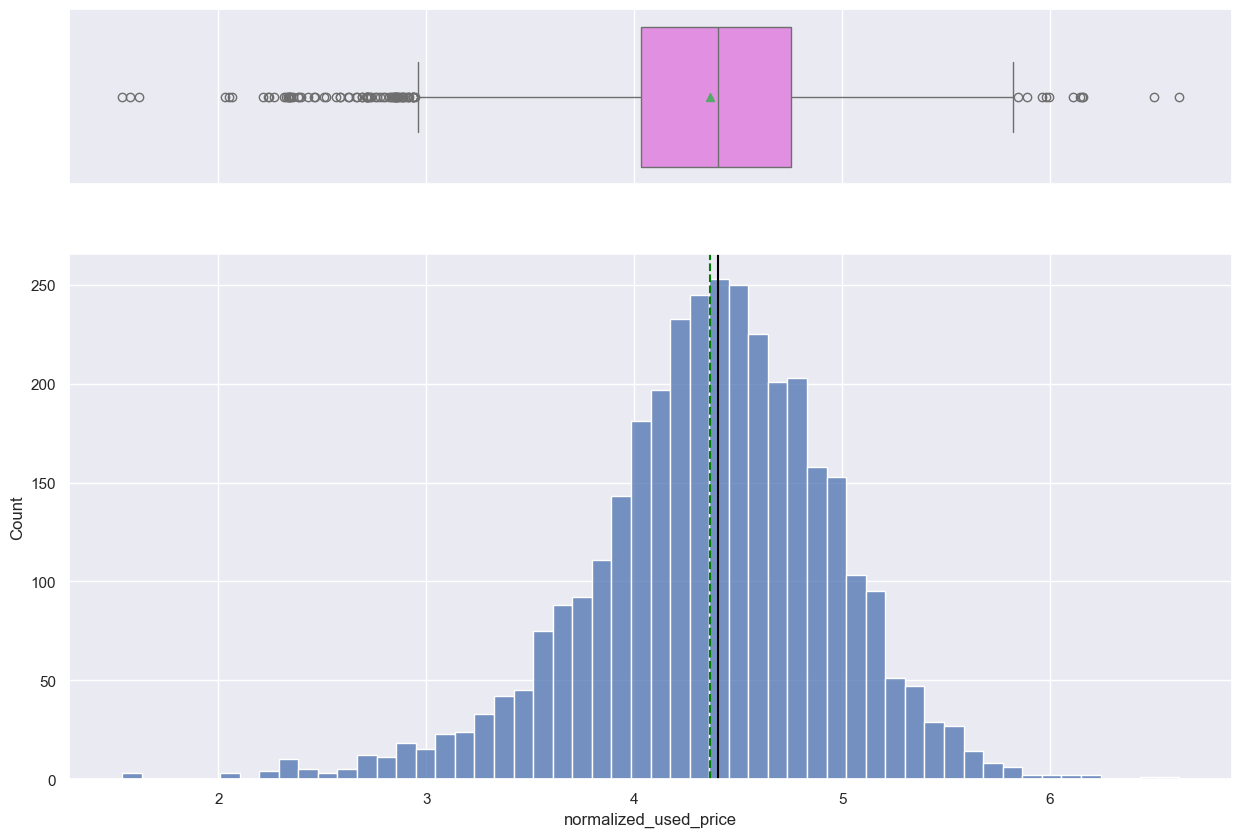

In [646]:
histogram_boxplot(df, "normalized_used_price")

### INSIGHT
- This is an Approximately Normal distribution, mostly symmetrical around the mean and median
- There are many outliers on both ends possibly heavily used, outdated, or poor specifications or likely new releases or premium models that haven’t depreciated much.
- Most used phones fall into a tight range — centered around the 4.0 to 4.8 mark

**`normalized_new_price`**

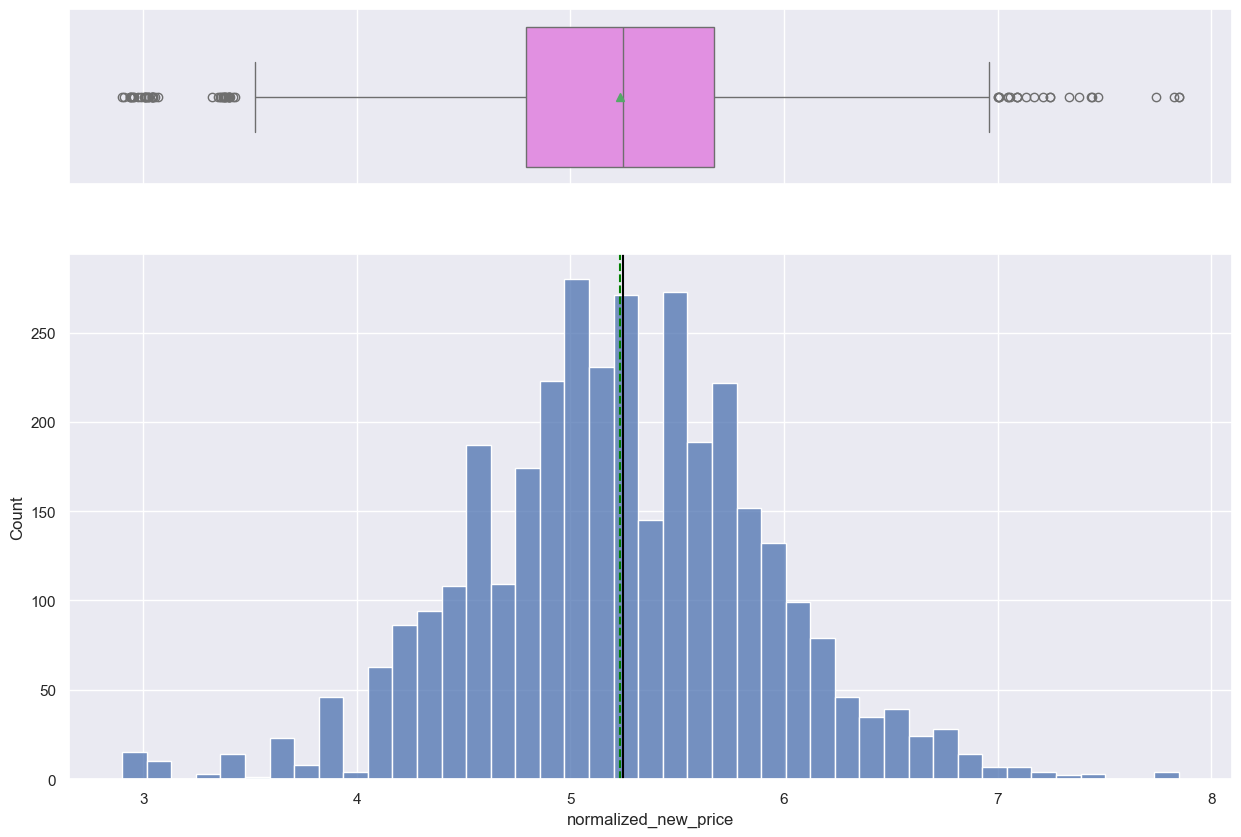

In [648]:
histogram_boxplot(df,'normalized_new_price')  ## Histogram_boxplot for 'normalized_new_price'

### INSIGHT
- This is a slight Right-Skewed Distribution. The data is nearly symmetrical but with a slightly longer right tail.This means there are more expensive outliers than cheap ones for new phones.
- New phones are generally sold around a consistent price point, but some premium models push the distribution upward.
- The market for used phones is broader, with more devices depreciating heavily or priced very low.

**`screen_size`**

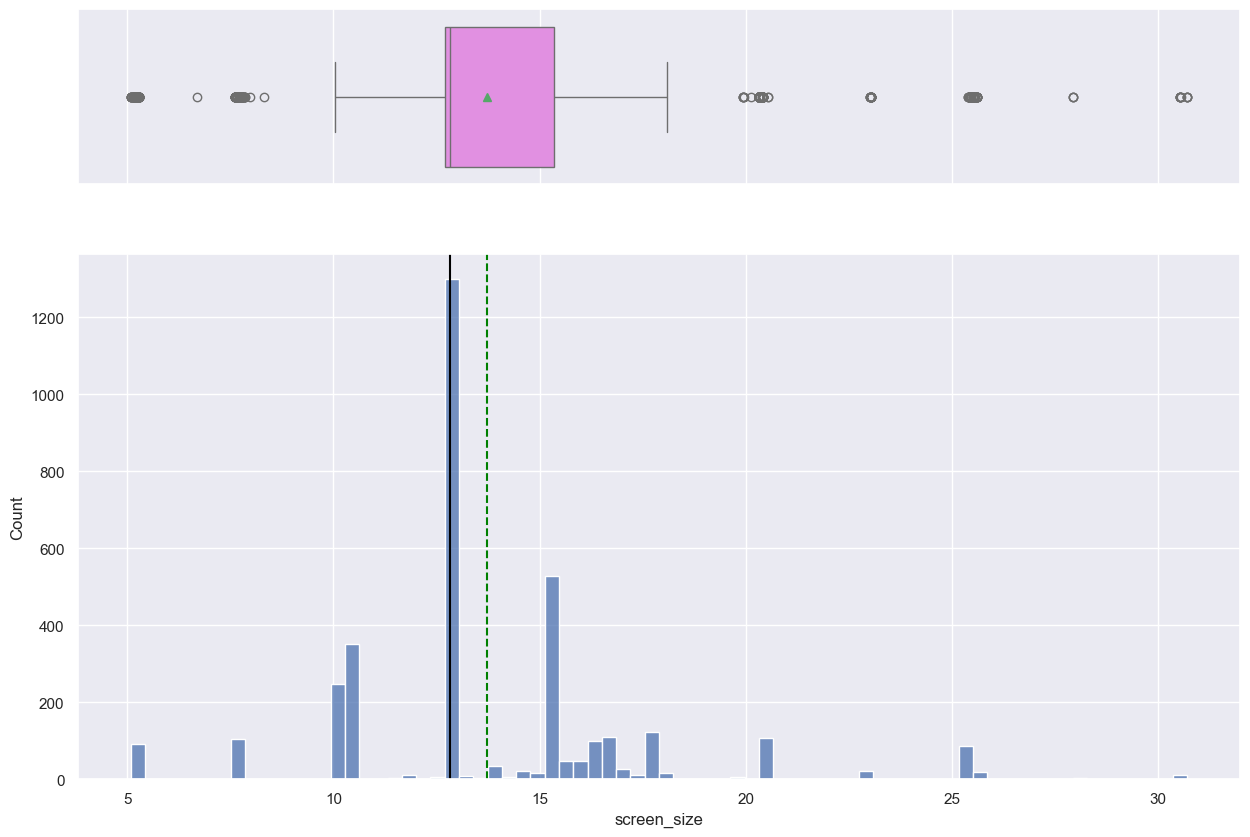

In [650]:
histogram_boxplot(df,'screen_size')  ## Histogram_boxplot for 'screen_size'

### INSIGHT
- This is a right-skewed distribution with numerous outliers on both ends, especially the high end
- This means most phones have screen sizes clustered around 12–14 inches.
- A few very large devices (maybe tablets or incorrect entries) stretch the distribution.

**`main_camera_mp`**

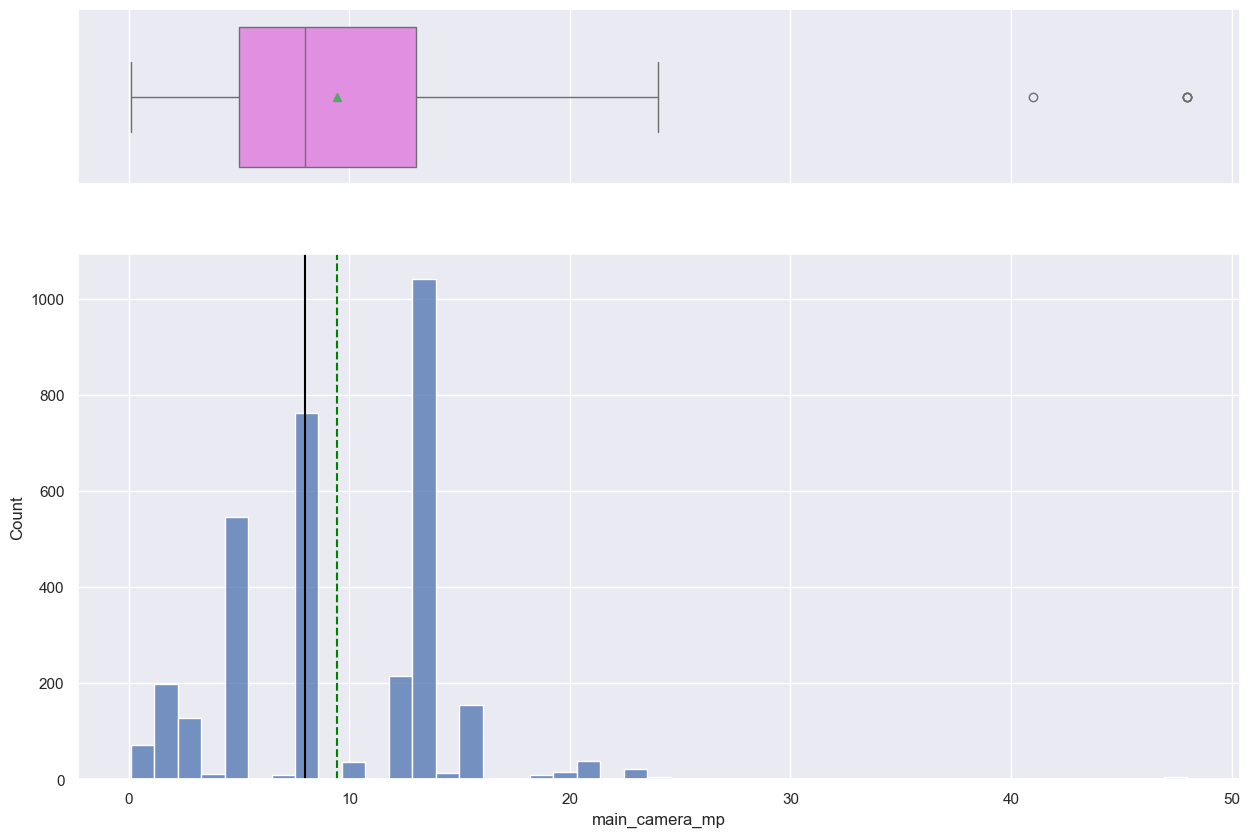

In [652]:
histogram_boxplot(df,'main_camera_mp')  ## Histogram_boxplot for 'main_camera_mp'

### INSIGHT
-There's a strong peak around 13 MP, which is likely the mode — a common camera resolution in smartphones.
- This is a Right-skewed or positively skewed distribution indication more phones have lower MP cameras, but with a few high-end ones go all the way up to about 48 MP.
- There's a small number of phones with very low MP values (0–2 MP) and very high outliers (above 30 MP).

**`selfie_camera_mp`**

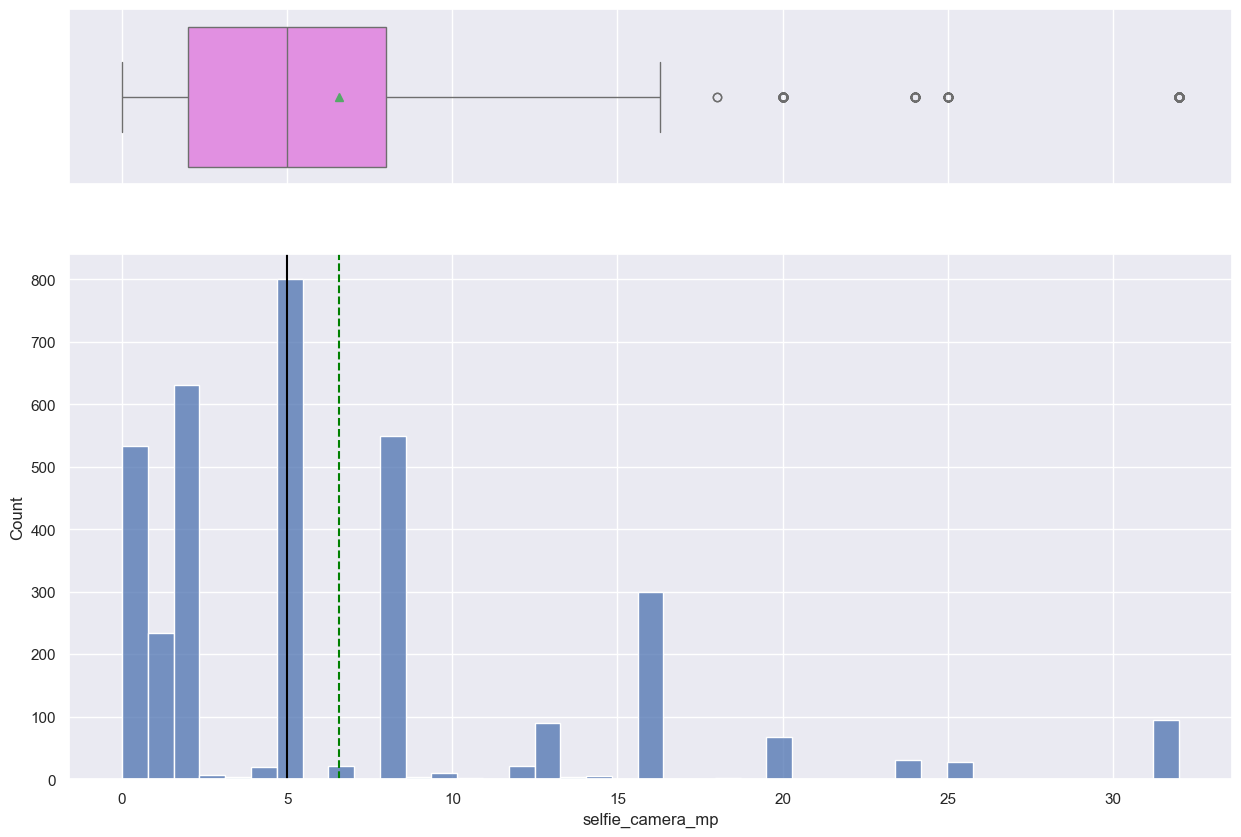

In [654]:
histogram_boxplot(df,'selfie_camera_mp')  ## Histogram_boxplot for 'selfie_camera_mp'

### INSIGHT
- This is Right-Skewed or Positively Skewed distribution
- Most devices have lower selfie camera megapixels (MP).
- The majority of devices have a selfie camera between 2 MP and 8 MP.
- There is a small but significant segment of premium devices with very high-resolution selfie cameras (above 15 MP).

**`int_memory`**

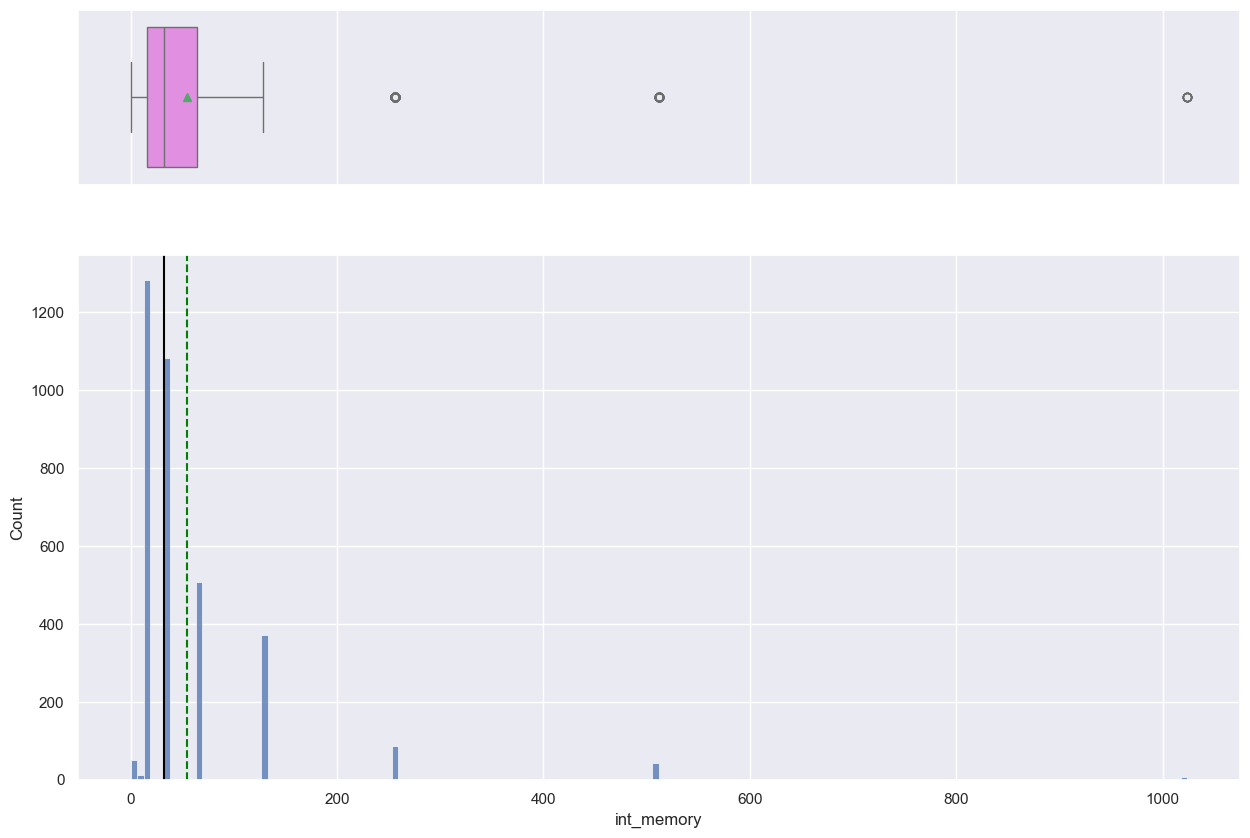

In [656]:
histogram_boxplot(df,'int_memory')  ## Histogram_boxplot for 'int_memory'

### INSIGHT
- This is  a right-skewed positively skewed distribution.
- Majority of devices have a low int_memory. Long tail to the right indicates a few with very large int_memory.

**`ram`**

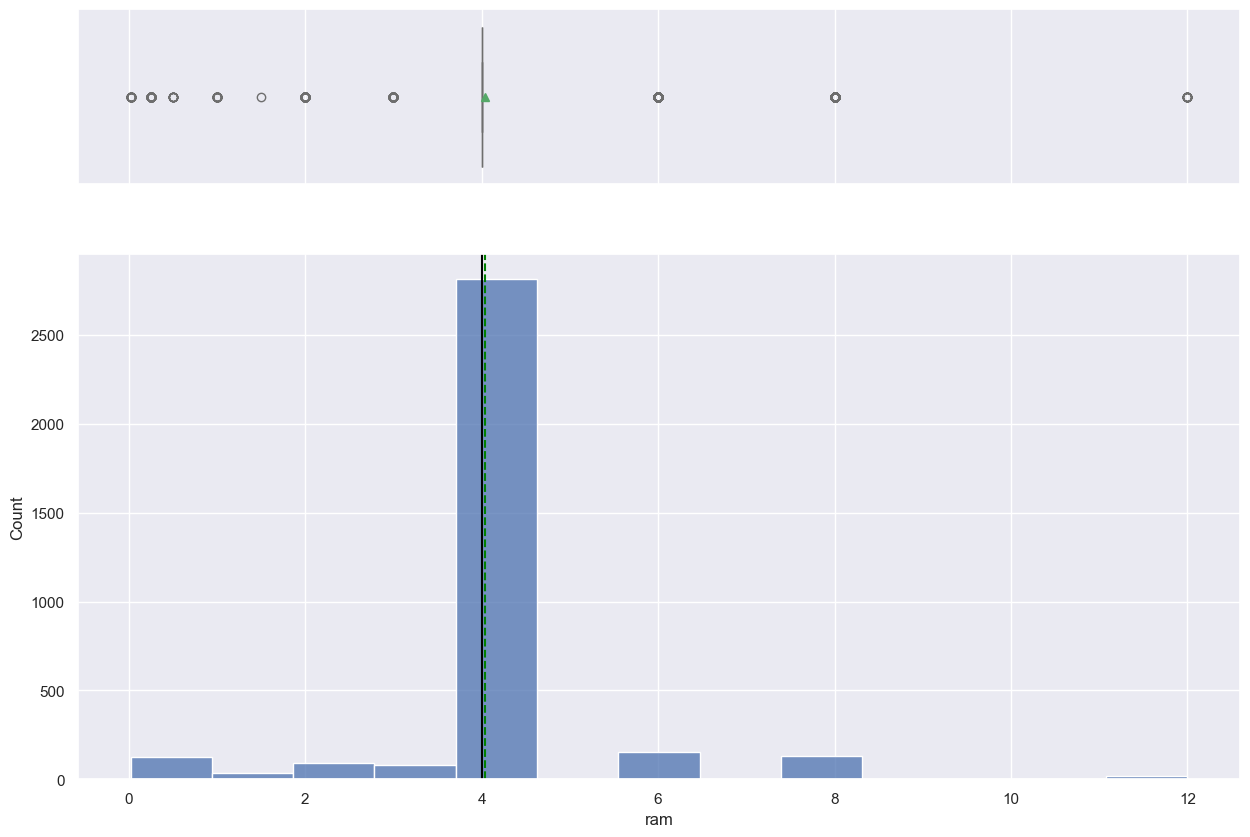

In [658]:
histogram_boxplot(df,'ram')  ## Histogram_boxplot for 'ram'

### INSIGHT
- This is showing a highly left-skewed distribution also called negatively skewed.
- A higher number of devices have ram size of about 4GB with few on the lower end  ram size


**`weight`**

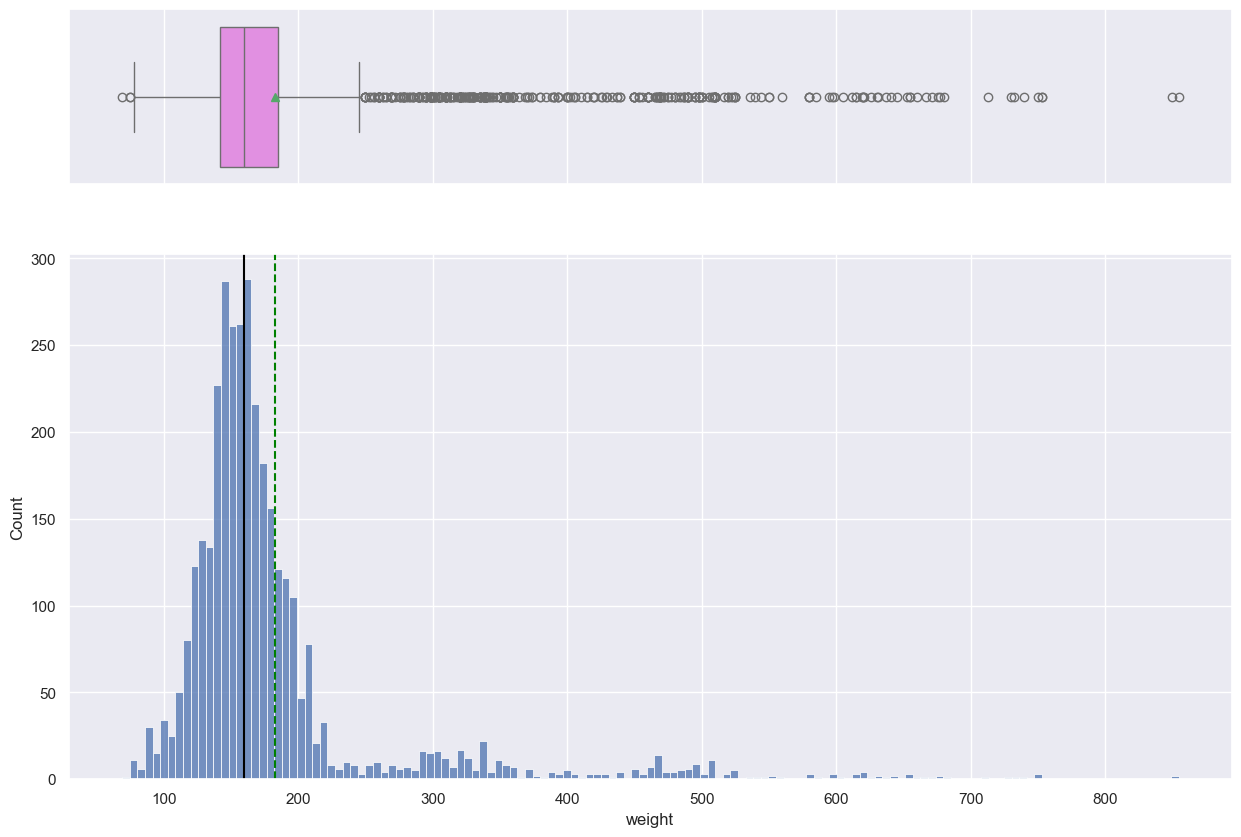

In [660]:
histogram_boxplot(df,'weight')  ## Histogram_boxplot for 'weight'

### INSIGHT
- The distribution is Right-skewed indicationd that most phones are relatively lightweight between 100g and 200g
- The presence of outliers suggests there are a few exceptionally heavy devices 

**`battery`**

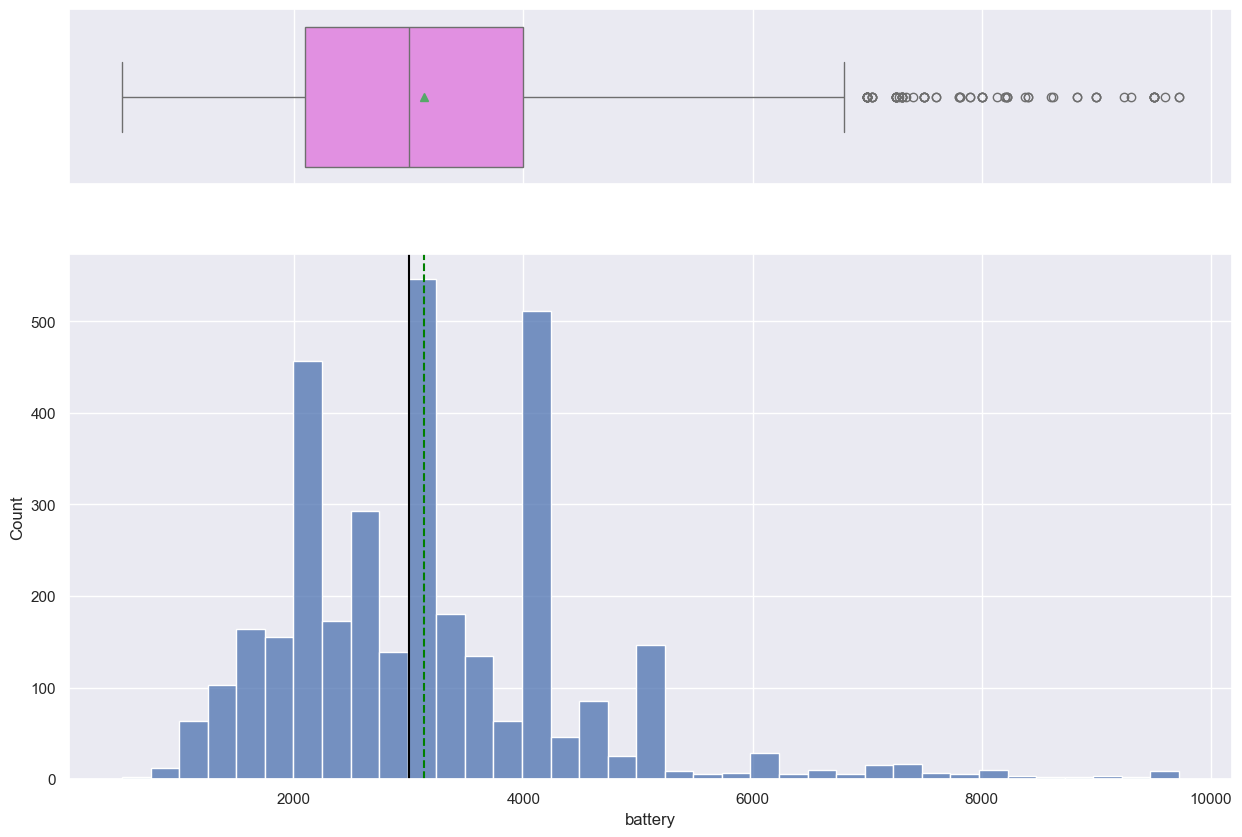

In [662]:
histogram_boxplot(df,'battery')  ## Histogram_boxplot for 'battery'

### OBSERVATONS
- This is a multimodal and right-skewed distribution with a high concentration of battery capacity of 2100 mAh and another around 4000 mAh.
- There is also a long right tail suggesting a small number of high-capacity devices
### INSIGHT
- Devices with ~2000 mAh batteries – likely older or budget smartphones.
- Devices with ~4000 mAh batteries – more modern or mid-to-high-end phones.
- Outliers above 6000 mAh: These could be power-user phones or tablets and may skew some analyses if not handled.

**`days_used`**

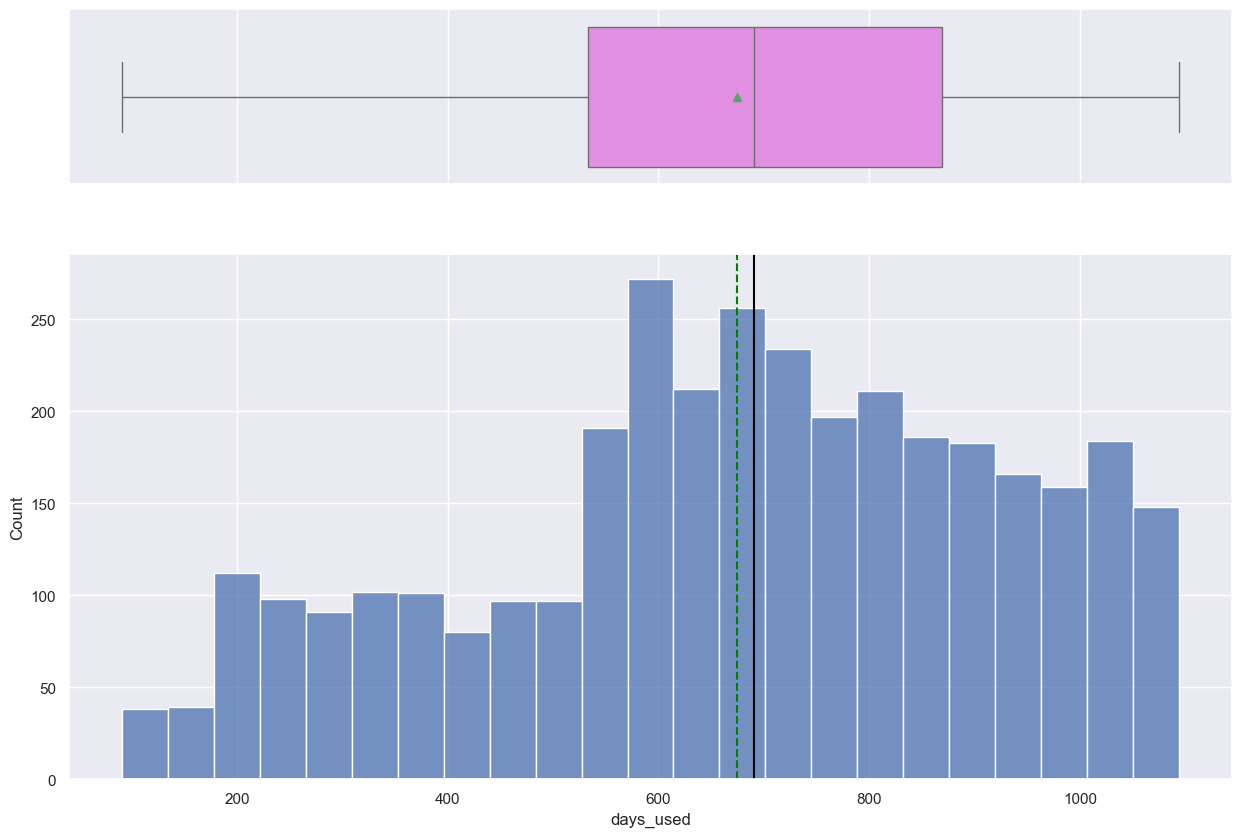

In [664]:
histogram_boxplot(df,'days_used')  ## Histogram_boxplot for 'days_used'

### OBSERVATIONS
- This is a roughly uniform with a slightly right-skewed tail distribution
- The distribution rises after ~400 days and remains relatively flat between 600 and 1000+ days.
- There's a gentle decline beyond ~900 days, with the frequency dropping a bit.
### INSIGHT
- Most phones have been used between ~600 to ~1000 days — that’s roughly 1.5 to 3 years, aligning with typical smartphone lifecycles.
- Some phones are lightly used (~<300 days) — possibly newer models or underused devices.
- Very few extreme outliers on either end, suggesting a healthy spread and minimal noise.

**`brand_name`**

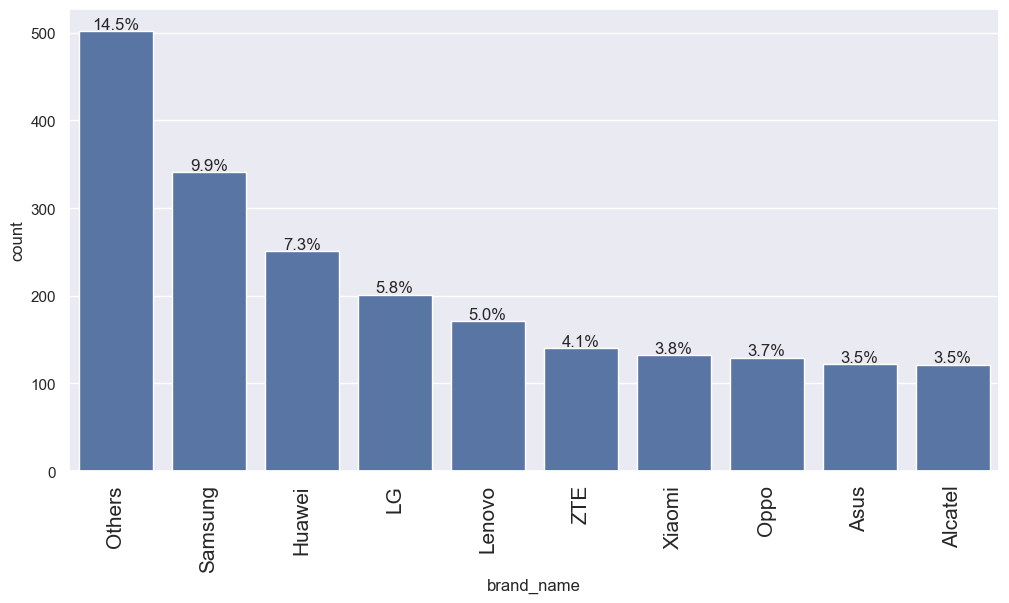

In [666]:
labeled_barplot(df, "brand_name", perc=True, n=10)

### INSIGHT
- Other brands of phone contributes the largest share of 14.5% followed by Samsung showing 9.9% share and Huawei with 7.3%
- This suggests that there may be many low-frequency brands grouped into this bucket
- The used phone market is highly fragmented beyond the top brands.
- Brands like Xiaomi, Oppo, Asus, and Alcatel have smaller shares (~3.5% to 3.8%).
- This indicates these brands are relatively less available in the secondary market in your data.

**`os`**

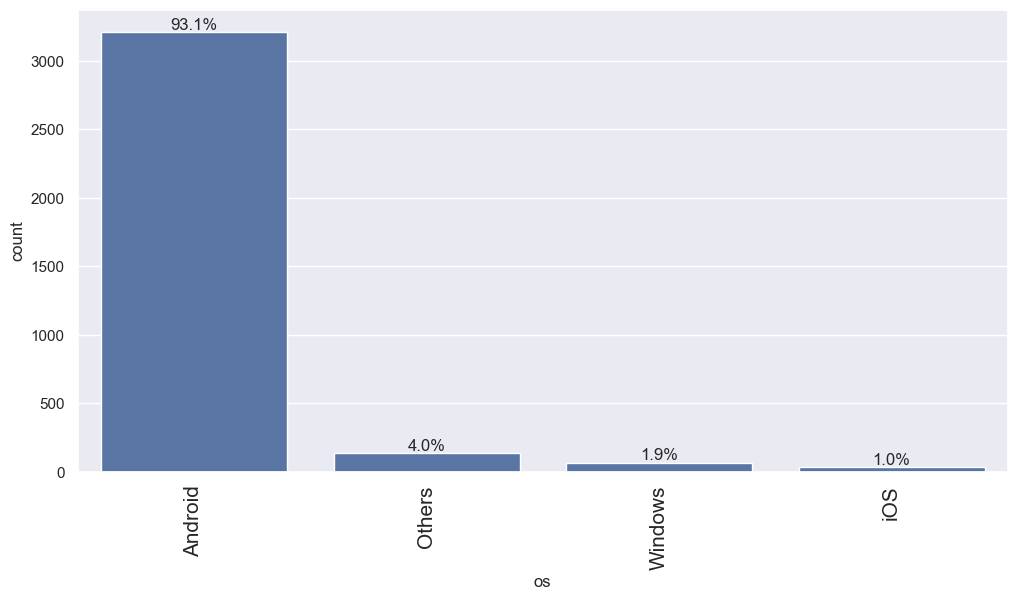

In [668]:
labeled_barplot(df, "os", perc=True, n=10) ## labeled_barplot for 'os'

### INSIGHT
- Android is the most popular with a market share of 93.1% with iOS devices only constituting 1.0% of share
- This suggests that the used device market is heavily Android-dominated.

**`4g`**

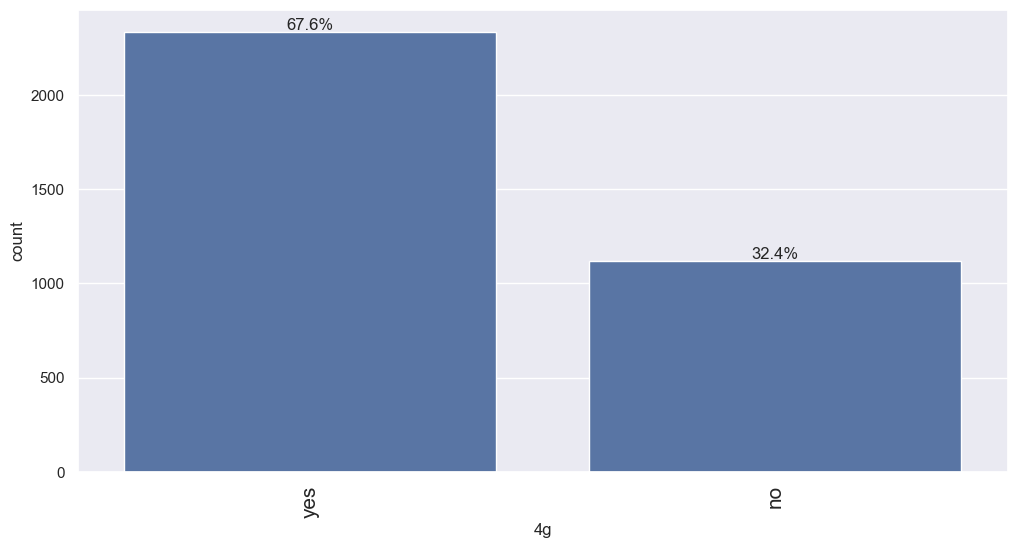

In [670]:
labeled_barplot(df, "4g", perc=True, n=10) ## labeled_barplot for '4g'

### INSIGHT
- Around 67.6% of the devices support 4G, while 32.4% do not.
- This indicates that 4G support is a common feature among used devices, but a significant portion (~1/3) of devices still lack 4G capability.

**`5g`**

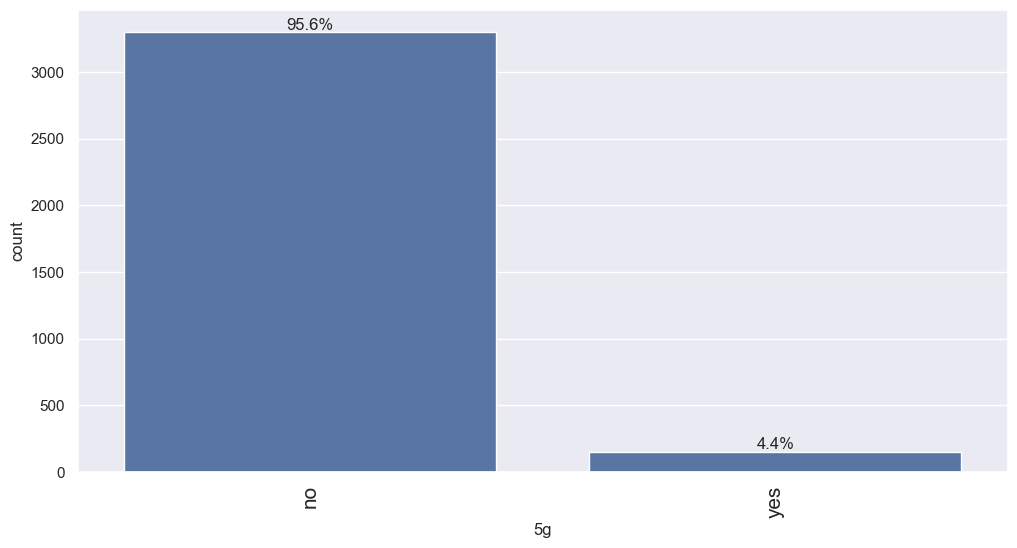

In [672]:
labeled_barplot(df, "5g", perc=True, n=10) ## labeled_barplot for '5g'

### INSIGHT
- A significant majority of devices (95.6%) do not support 5G.
- Only 4.4% of the devices in the dataset have 5G capability.

**`release_year`**

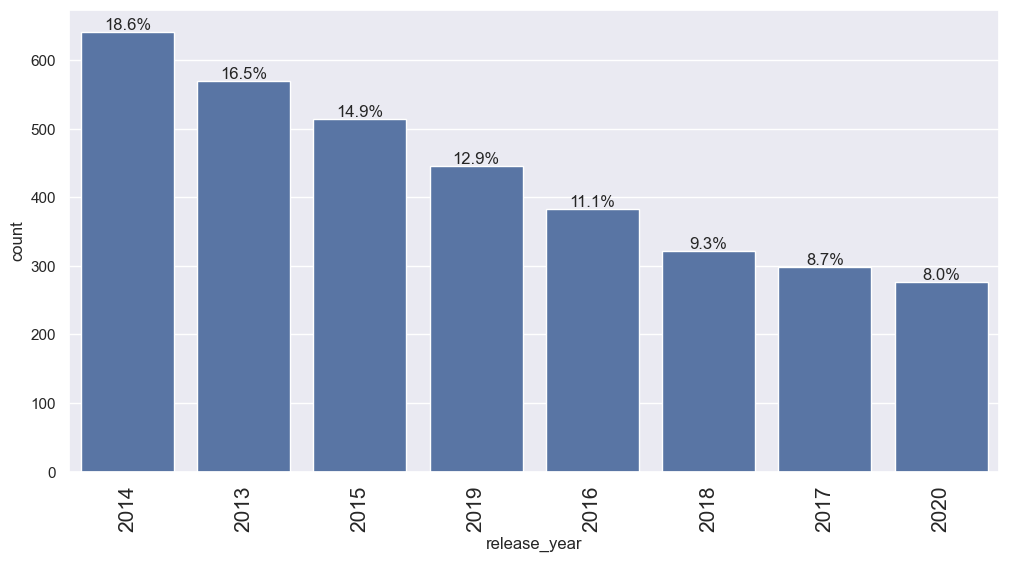

In [674]:
labeled_barplot(df, "release_year", perc=True, n=10) ## labeled_barplot for 'release_year'

### INSIGHT
- The majority of the devices were released between 2013 and 2015, contributing ~50% of the total devices.
- 2014 has the highest number of devices (~18.6%) followed closely by 2013 (~16.5%).
- After 2015, the number of devices declines steadily, indicating fewer older devices in the dataset.
- Recent years (2019-2020) have a smaller share (around 8%-13%), possibly due to fewer devices entering the used device market from recent releases.

### Bivariate Analysis

**Correlation Check**

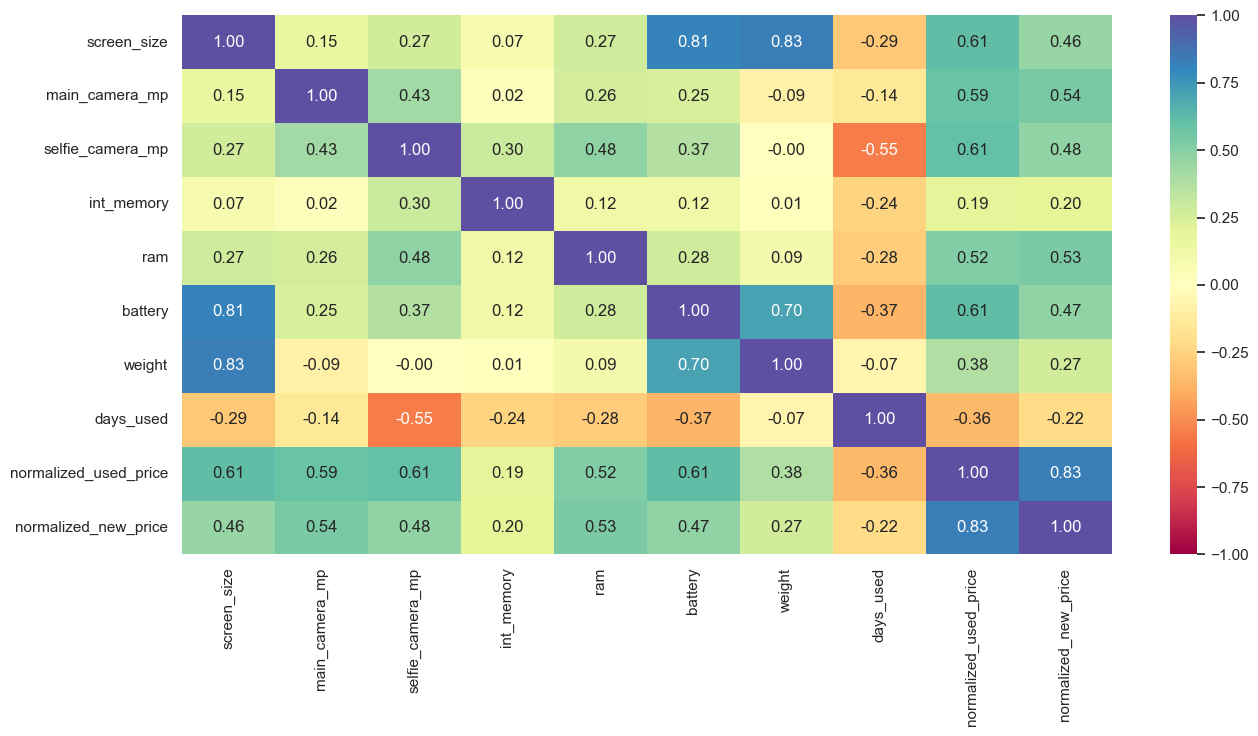

In [676]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

### INSIGHT
- Internal Memory is positively correlated to RAM suggesting that Devices with higher internal memory usually come with more RAM
- Normalized New Price is positively correlated to RAM and Internal Memory indicating that Newer, more expensive devices tend to have better specs—more RAM and storage
- Normalized Used Price also have a positive correlation with Normalized New Price suggesting that Used prices are strongly tied to the original price, although some depreciation is expected.
  

**The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.**

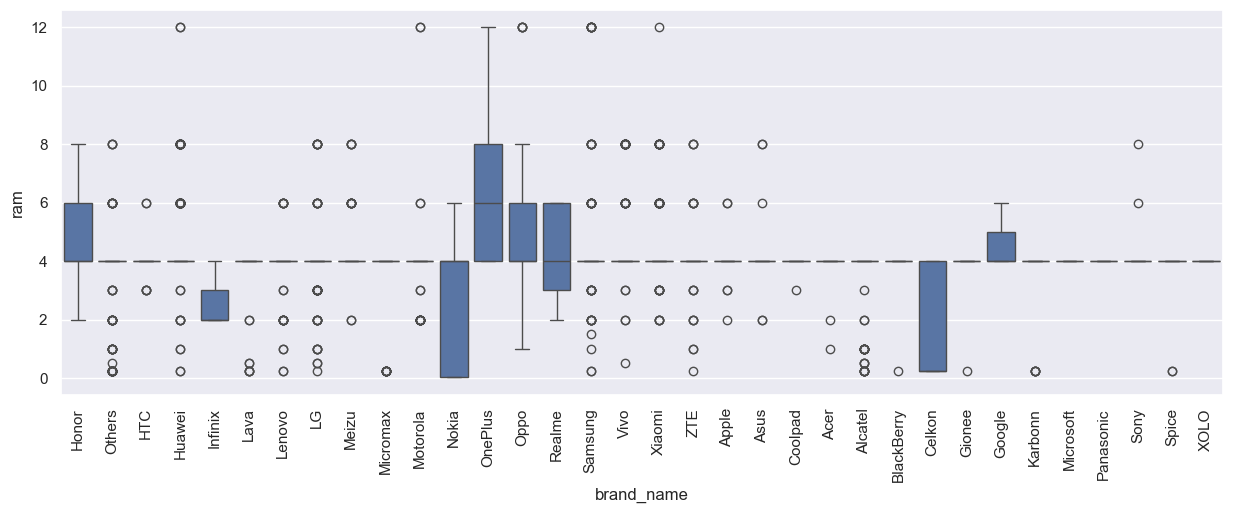

In [678]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

### INSIGHT
- Apple devices have a relatively narrow range of RAM, centered around lower values compared to Android brands.
- Samsung, OnePlus, and Xiaomi generally offer higher RAM configurations with a wider range, showing both budget and flagship models.
- Realme, Vivo, and Oppo also show diverse RAM offerings, suggesting they cover various market segments.
- Brands like Infinix and Tecno tend to cluster around lower RAM values, indicating a focus on budget devices.

**People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [782]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

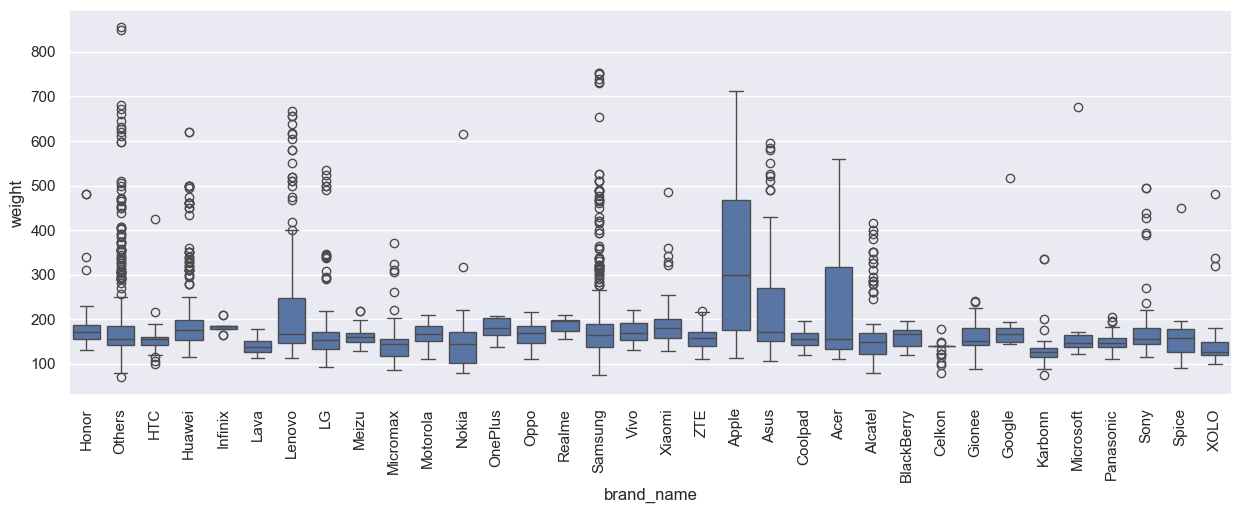

In [784]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='brand_name', y='weight') ## Boxplot for 'brand_name' and 'weight'
plt.xticks(rotation=90)
plt.show()

### INSIGHT
- There are 341 devices in the dataset with a battery capacity greater than 4500 mAh.
- Samsung, Xiaomi, and Realme offer a good range of high-battery devices with relatively balanced weight, showing they manage to pack in large batteries without excessively increasing bulk.
- Lenovo and Huawei show higher median weights for large-battery phones, suggesting a trade-off where weight might be sacrificed for capacity or ruggedness.
- A few brands like OnePlus and Infinix show some outliers with notably heavy devices, which may be specific gaming or rugged models.


**People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.**

In [684]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

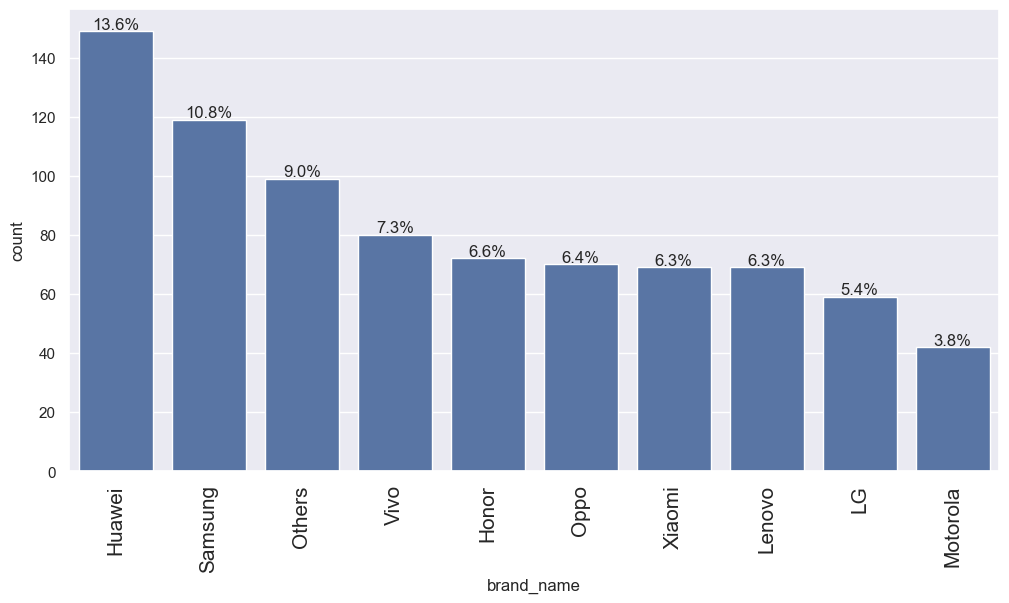

In [686]:
labeled_barplot(df_large_screen, "brand_name", perc=True, n=10) ## Labeled_barplot for 'brand_name' in large screen dataframe

### INSIGHT
- There are 1,099 devices in the dataset with a large screen (greater than 6 inches or 15.24 cm), making them suitable for entertainment like video streaming or gaming.
- Samsung holds the top spot, making up a substantial portion of large-screen offerings.
- Xiaomi, Realme, Infinix, and Vivo are also key players, likely offering a mix of affordable and mid-range models with big displays.
- These brands clearly recognize consumer demand for immersive screens—perfect for video streaming, gaming, and reading.


**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

In [688]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

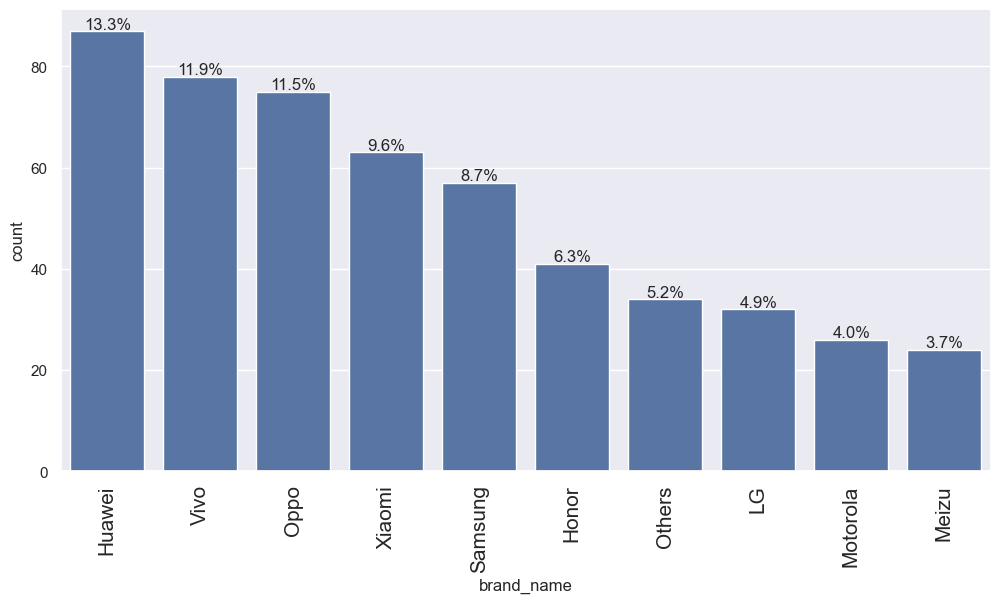

In [690]:
labeled_barplot(df_selfie_camera, "brand_name", perc=True, n=10) ## Labeled_barplot for 'brand_name' in high selfie camera dataframe

### INSIGHT
- There are 655 devices in the dataset with selfie cameras greater than 8 MP, making them attractive options for selfie lovers and social media enthusiasts.
- Samsung, Xiaomi, and Vivo lead in offering high-MP front cameras, appealing to customers who prioritize selfies.
- Oppo, known for marketing selfie-centric phones, also has a strong presence.


**Let's do a similar analysis for rear cameras.**

- Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

In [692]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

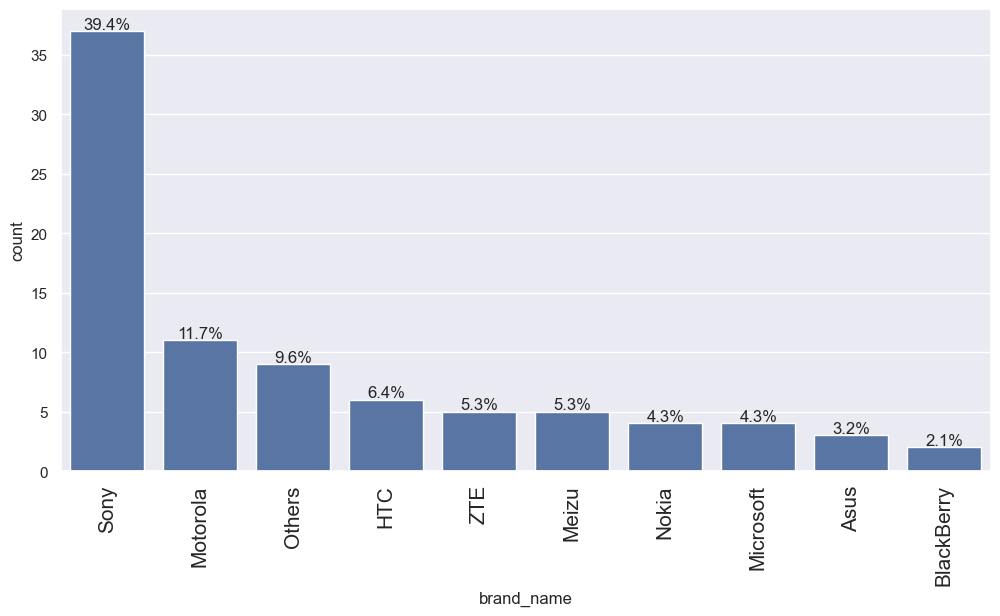

In [694]:
labeled_barplot(df_main_camera, "brand_name", perc=True, n=10) ## Labeled_barplot for 'brand_name' in high main camera dataframe

### INSIGHT
- There are 94 devices in the dataset with main (rear) cameras greater than 16 MP, indicating a more select group of devices focused on high-resolution photography.
- Samsung, Xiaomi, and Realme again stand out, showing they consistently offer high-performance cameras across multiple models.
- OnePlus, Vivo, and Oppo also provide a good number of high-resolution rear camera options, especially in the mid-to-premium range.
- Apple has a modest presence here, which may reflect a focus on sensor quality and image processing over just megapixels.
- The smaller number of high-MP rear camera devices suggests that camera performance often depends on more than just resolution.

**Let's see how the price of used devices varies across the years.**

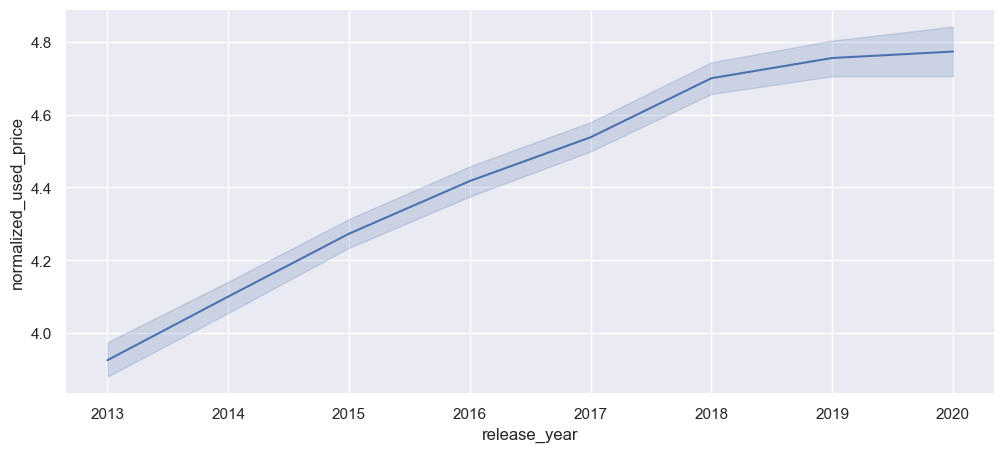

In [696]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x="release_year", y="normalized_used_price") ## Lineplot for release year and used price
plt.show()

### INSIGHT
- Newer devices (from 2020 to 2022) generally have higher used prices, which is expected as they're closer to their original launch and retain more value.
- There's a sharp decline in used price for devices released before 2018, indicating depreciation over time.
- The pricing curve is relatively smooth, showing a typical depreciation trend rather than sudden drops, which suggests a stable second-hand market.

**Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.**

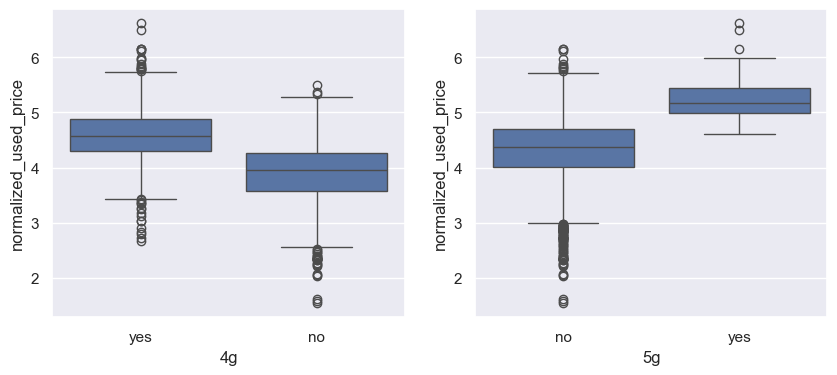

In [698]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

### INSIGHT
- 4G Support:
    Most devices support 4G, and they show a wide spread in prices, indicating a variety of models from budget to premium.
    Devices without 4G tend to have significantly lower used prices, likely due to older technology or limited usability today.

- 5G Support:
    Devices with 5G support are clearly more expensive on average in the used market.
    This reflects their newer release dates, better hardware, and growing demand for future-proof connectivity.

- Non-5G devices dominate the dataset but come at more affordable prices.

## Data Preprocessing

### Missing Value Imputation

- We will impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

In [700]:
# let's create a copy of the data
df1 = df.copy()

In [702]:
# checking for missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [704]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['release_year', 'brand_name'])[col].transform("median")
    )   ## Complete the code to impute missing values in cols_impute with median by grouping the data on release year and brand name

# checking for missing values
df1.isnull().sum() ## Missing values after imputing the above columns

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

- We will impute the remaining missing values in the data by the column medians grouped by `brand_name`.

In [706]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median")
    ) ## Missing values in cols_impute with median by grouping the data on brand name

# checking for missing values
df1.isnull().sum() ## Missing values after imputing the above columns

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

- We will fill the remaining missing values in the `main_camera_mp` column by the column median.

In [708]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median()) ## Impute the data with median

# checking for missing values
df1.isnull().sum() ## Check missing values after imputing the above columns

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

### COMMENTS
All missing values have been treated

### Feature Engineering



- Let's create a new column `years_since_release` from the `release_year` column.
- We will consider the year of data collection, 2021, as the baseline.
- We will drop the `release_year` column.

In [710]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

In [712]:
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


### Outlier Check



- Let's check for outliers in the data.

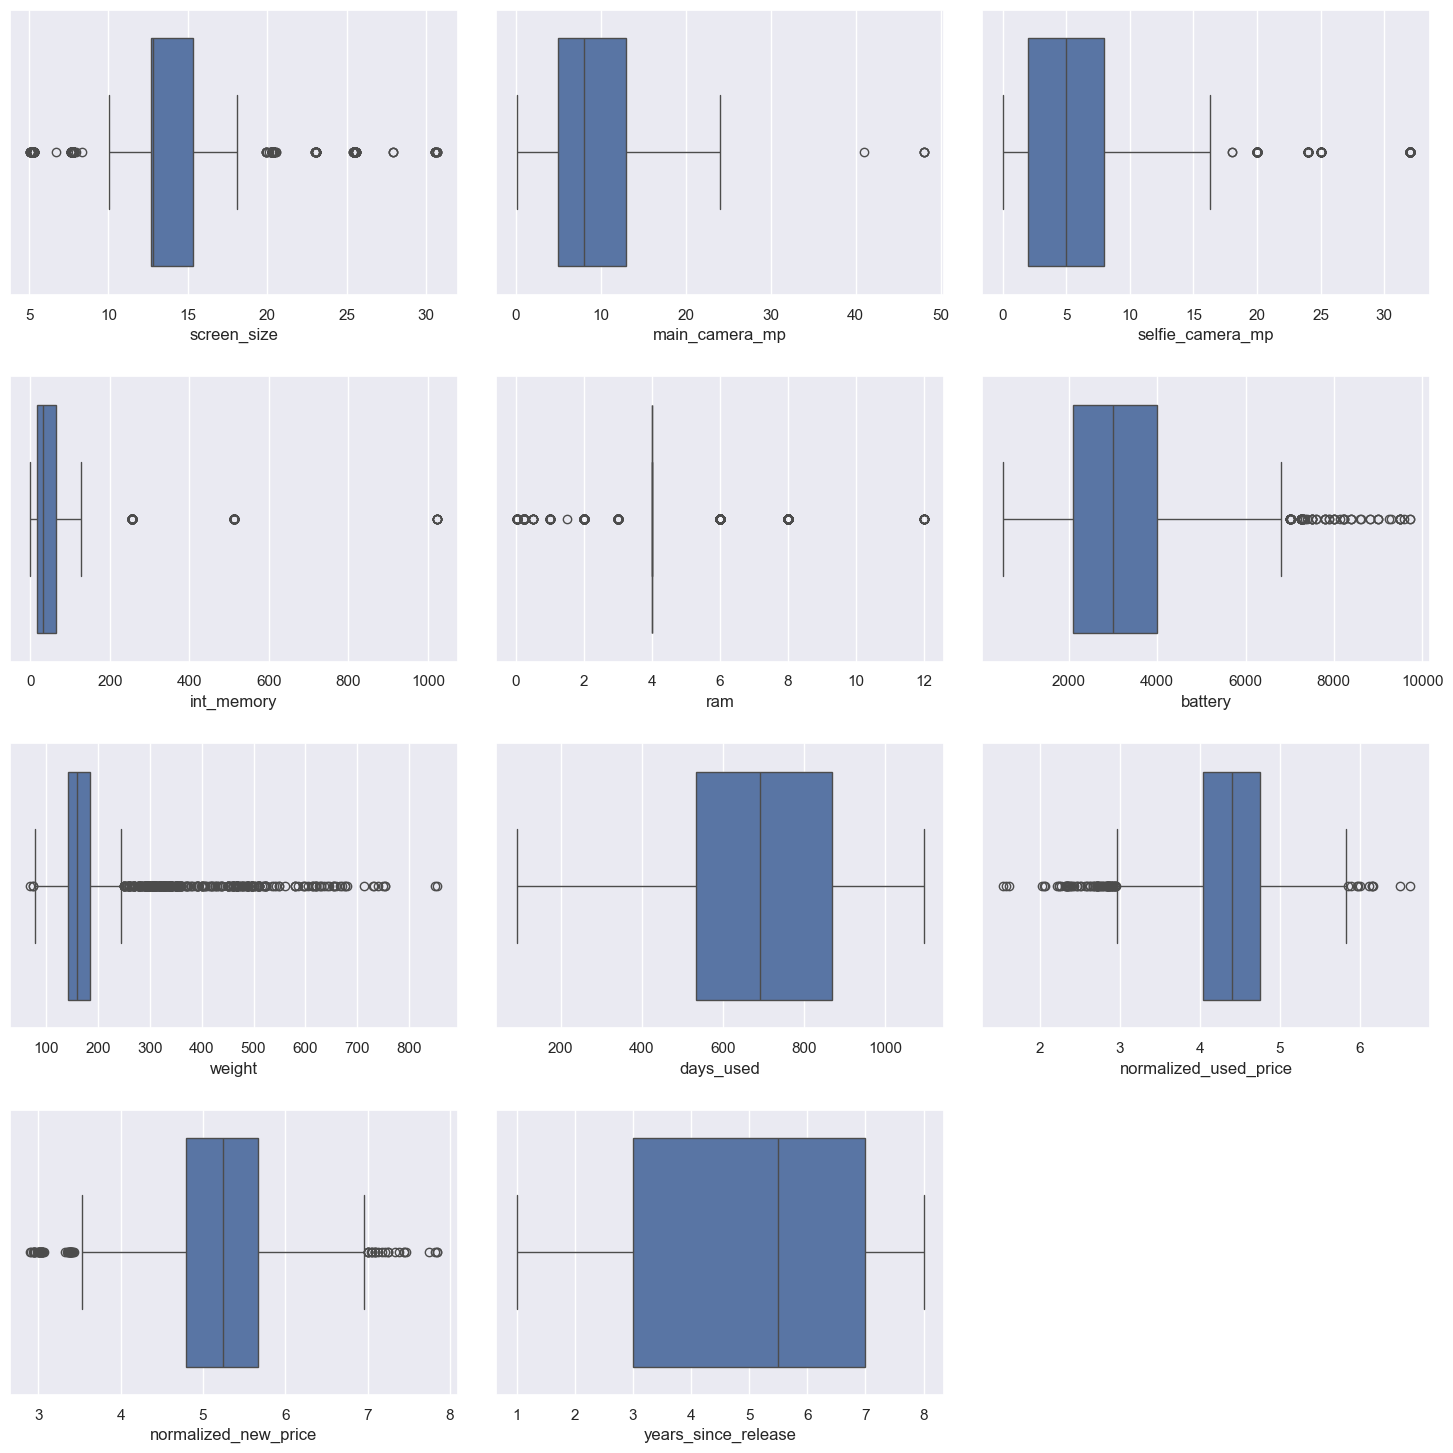

In [714]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

## INSIGHT
- Significant right-skew with multiple high-end outliers, likely from flagship or premium models
- Outliers at the higher end, likely due to high-spec device
- Some possible inconsistencies in ram
- Outliers are mostly at the top, suggesting premium devices with high-megapixel cameras.
- These are expected, though some ultra-high values may merit review.
- A few extreme values, especially in battery
- weight also has heavy outliers, possibly due to devices with large screens or metal builds
- Some large-screen outliers (likely tablets or phablets)

### Data Preparation for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [787]:
## Define the dependent and independent variables
X = df1.drop(columns=['normalized_used_price'])
y = df1['normalized_used_price']

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [789]:
# let's add the intercept to data
X = sm.add_constant(X)

In [791]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
) ## Create dummies for independent features
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,False,False,False,False,False,False,False,False,True,False
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,False,False,False,False,False,False,False,False,True,True
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,False,False,False,False,False,False,False,False,True,True
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,False,False,False,False,False,False,False,False,True,True
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,False,False,False,False,False,False,False,False,True,False


In [793]:
# converting the input attributes into float type for modeling
X = X.astype(float)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127.0,4.715100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325.0,5.519018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162.0,5.884631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345.0,5.630961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293.0,4.947837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [795]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) ## Complete the code to split the data into train and test in specified ratio


In [797]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression


In [799]:
olsmodel1 = sm.OLS(y_train, x_train).fit()
print(olsmodel1.summary()) ## fit OLS model

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                           11:20:28   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Interpreting the Regression Results:

1. R-squared: 0.845 - The model explains about 84.5% of the variance in used device prices.

2. Adjusted. R-squared: 0.842 - It reflects a strong fit of the model even after adjusting for number of predictors.

3. ***const* coefficient**: 1.3156
    
4. **Coefficient of a predictor variable**:
   - selfie_camera_mp has a coefficient of 0.0135. This means for every additional megapixel in the selfie camera, the normalized used price is expected to increase by 0.0135 units, assuming all other factors remain the same.
   - 5g_yes has a coefficient of -0.0714. This suggests that 5G-capable devices tend to have a slightly lower normalized used price, when controlling for all other variables

### Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [801]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [811]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [813]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test) ## Check the performance on test data
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


Observations

The training R-squared is 0.845, so the model is not underfitting

The train and test RMSE and MAE are comparable, so the model is not overfitting either

MAE of 0.1847 implies that the model's average absolute prediction error is about 18.5% of the used price range on the test data

MAPE of 4.50 on the test data means that we are able to predict within 4.50% of the normalized used price

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY



- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.

In [839]:
#Let's define a function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [841]:
checking_vif(x_train)  ## Check VIF on train data

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


## COMMENTS
There are multiple columns with very high VIF values, indicating presence of strong multicollinearity
We will systematically drop numerical columns with VIF > 5
We will ignore the VIF values for dummy variables and the constant (intercept)

### Removing Multicollinearity (if needed)



To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5. (only for continuous variables not for dummy variables)
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [843]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [845]:
col_list = ["screen_size", "weight"] ## Complete the code to specify the columns with high VIF

res = treating_multicollinearity(x_train, y_train, col_list) ## Complete the code to check the effect on model performance after dropping specified columns from train data
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


### COMMENTS:
- Dropping screen_size slightly improves model fit (higher adjusted R²) and reduces RMSE compared to dropping weight.
- This suggests that screen_size may be more responsible for multicollinearity without sacrificing predictive power.

In [847]:
col_to_drop = "screen_size" ## Complete the code to specify the column to drop
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] ## Complete the code to specify the train data from which to drop the column specified
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)] ## Complete the code to specify the test data from which to drop the column specified

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,202.673906
1,main_camera_mp,2.281835
2,selfie_camera_mp,2.809009
3,int_memory,1.362043
4,ram,2.282350
5,battery,3.842989
6,weight,2.993855
7,days_used,2.648929
8,normalized_new_price,3.077650
9,years_since_release,4.730315


### COMMENTS
- Dropping screen_size reduced multicollinearity slightly, but Apple/iOS pair still has a strong correlation.
- You could consider dropping either brand_name_Apple or os_iOS next for further improvement.

### Dropping high p-value variables (if needed)

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [849]:
# initial list of columns
predictors = x_train2.copy()  ## Check for p-values on the right dataset
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [851]:
x_train3 = x_train2[selected_features]  ## train data from which to select the specified columns
x_test3 = x_test2[selected_features]  ## test data from which to select the specified columns

In [853]:
olsmodel2 = sm.OLS(y_train, x_train3).fit() ## Fit OLS() on updated dataset (no multicollinearity and no insignificant predictors)
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                           12:01:54   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [855]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train3, y_train) ## Check performance on train data
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [857]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test3, y_test) ## Check performance on test data
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


### Observations

Now no feature has p-value greater than 0.05, so we'll consider the features in x_train3 as the final set of predictor variables and olsmodel2 as the final model to move forward with
- The similarity between training and test metrics confirms that the model generalizes well. There's no sign of overfitting.
- An R² of ~0.84 means the model explains about 84% of the variation in the normalized used price — that's quite strong for real-world pricing models.
- Both RMSE and MAE are low and close across datasets, which confirms model stability and high accuracy.
- With an MAPE < 5% in suggest the model is very precise, with predictions deviating on average by only 4.5% from actual values.

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE



- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [859]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867319,0.220169
1525,4.448399,4.602001,-0.153602
1128,4.315353,4.286957,0.028395
3003,4.282068,4.195169,0.086899
2907,4.456438,4.490563,-0.034125


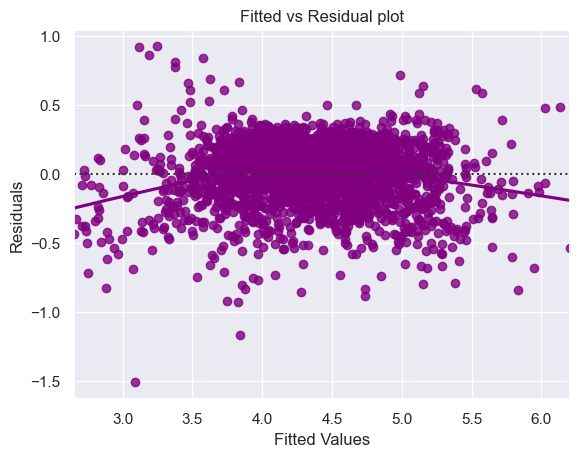

In [758]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

## OBSERVATIONS

- Residuals are mostly scattered randomly around the horizontal line at 0 — this supports linearity of the relationship between the independent and dependent variables.
- There’s a slight curve at both ends (left and right), which might suggest minor non-linearity at very low or very high predicted values.
- There is slight funneling on the sides, where residual spread seems a bit wider. This could suggest mild heteroscedasticity, though it’s not severe.
- No obvious clustering or trends in residuals — so residuals appear mostly independent of the fitted values.

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

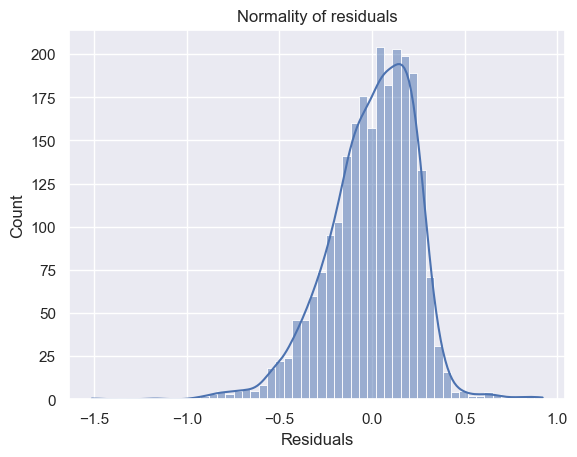

In [861]:
sns.histplot(data=df_pred,x="Residuals", kde=True) ## Plot the distribution of residuals
plt.title("Normality of residuals")
plt.show()

## OBSERVATIONS
- The residuals form a rough bell-shaped curve, centered around zero.
- This suggests that residuals are approximately normally distributed, which supports one of the key assumptions of linear regression.
- There is a slight left skew (longer tail on the negative side), but it’s not extreme.
- Residuals are close enough to normal to meet the assumption.
- The model seems statistically sound, with residuals that:
Are approximately normal

Are centered around 0

Show no major skew or outlier-driven shape

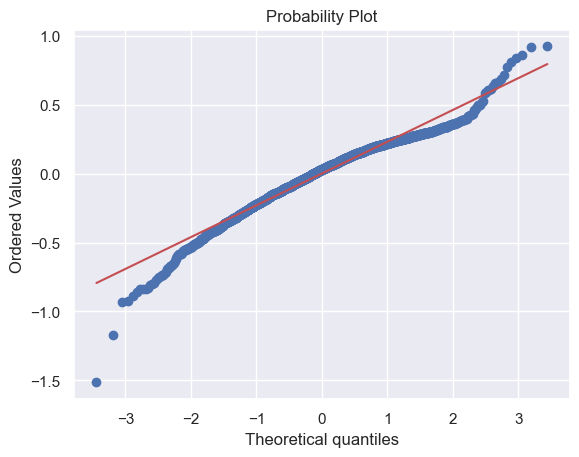

In [863]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab) ## Check Q-Q plot
plt.show()

## OBSERVATIONS
- Slight Non-Normality in Tails: There is some deviation in the extreme residuals, indicating heavier tails than a normal distribution (potential leptokurtosis).
- Overall Fit Still Acceptable: The majority of residuals lie close to the line — suggesting the normality assumption holds reasonably well, especially for predictive modeling purposes.
- Residuals are approximately normal with some mild deviations in the tails.
- For regression modeling, this level of deviation is generally acceptable.



In [865]:
stats.shapiro(df_pred["Residuals"]) ## Apply the Shapiro-Wilks test

ShapiroResult(statistic=0.9676950829900569, pvalue=6.983856712612207e-23)

### Intepretation:
- Since the p-value is much less than 0.05, we reject the null hypothesis.
- This means the residuals are not normally distributed at the 5% significance level.
- So, the assumption is satisfied

### TEST FOR HOMOSCEDASTICITY



- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [867]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3) ## train data to apply the Goldfeldquandt test
lzip(name, test)

[('F statistic', 1.008750419910676), ('p-value', 0.4401970650667301)]

### Interpretation:

- Since the p-value > 0.05, we fail to reject the null hypothesis.
- This means there's no strong evidence of heteroscedasticity (non-constant variance).
- So, the assumption of constant variance (homoscedasticity) is satisfied.

### Predictions on test data (Additional Information)

In [869]:

# predictions on the test set( Additional Information)
pred = olsmodel2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.385671
2341,3.696103,4.003934
1913,3.592093,3.643812
688,4.306495,4.103463
650,4.522115,5.113026
2291,4.259294,4.398406
40,4.997685,5.459871
1884,3.875359,4.053143
2538,4.206631,4.035868
45,5.380450,5.227899


### OBSERVATIONS

- Most predictions are reasonably close to actuals, which supports the model's good general performance (as seen in your R², RMSE, etc.).
- A few larger errors (like at index 650 and 40) could be potential outliers or areas for improvement.
- There's no extreme bias in either direction (not consistently over- or under-predicting).

## Final Model Summary

Let's recreate the final model and print it's summary to gain insights.

In [871]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [873]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit() ## fit the final model
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                           12:03:11   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [875]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
) ## Check the performance on train data
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [877]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
) ## Check performance on test data
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


- The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting
- The MAPE on the test set suggests we can predict within 4.55% of the normalized_used_price
- The MAE for training and test data barely changed indicating a stable performance
- There is minimal difference between the MAPE for training and test data which supports model robustness.

### CONCLUSION
- The model is robust and generalizes well to unseen data.
- No significant drop in performance metrics → no signs of overfitting.
- This model can confidently be used for predicting normalized used prices.

##  Actionable Insights and Recommendations

### ACTIONABLE INSIGHTS
- New device price is the strongest driver
- Camera quality influences resale value of the device
- Performance features add value to the device
- Time on market reduce value of device
- Brand perception drives resale value
- Operating System affects the value of the device
- Network Capabilities like 4G and 5G has a influence on the value of the device

### RECOMMENDATIONS
- Bundle value-enhancing features like better cameras, RAM, and 4G for higher resale value.
- Leverage brand strength in pricing strategies — especially for brands with high resale reputation.
- Regularly update models and highlight camera quality and performance in marketing.
- Buy phones with higher RAM, strong camera specs, and mainstream OS for better resale value.
- Avoid lesser-known OS variants or experimental devices if resale is a priority.
- Sell sooner rather than later — as years since release significantly reduce value.
- Focus inventory on phones with better specs, newer models, and recognized brands.
- Price 5G-enabled devices carefully — customers may not be seeing the full value yet.

---------